# Thyroid Cancer Prediction
## Author: Eren ERIS

Dataset : https://www.kaggle.com/datasets/zsinghrahulk/differentiated-thyroid-cancer-recurrence/data

![](https://storage.googleapis.com/kaggle-datasets-images/4117281/7135487/593381dddb289cd7bb206f82b8400a08/dataset-cover.JPG?t=2023-12-06-06-26-44)

In [25]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_palette("pastel")

from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score,classification_report,confusion_matrix,f1_score
from sklearn.decomposition import PCA

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier 

In [2]:
df = pd.read_csv("/kaggle/input/differentiated-thyroid-cancer-recurrence/Thyroid_Diff.csv")

In [3]:
df.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


In [4]:
df.isnull().sum()

Age                     0
Gender                  0
Smoking                 0
Hx Smoking              0
Hx Radiothreapy         0
Thyroid Function        0
Physical Examination    0
Adenopathy              0
Pathology               0
Focality                0
Risk                    0
T                       0
N                       0
M                       0
Stage                   0
Response                0
Recurred                0
dtype: int64

In [ ]:
plt.figure(figsize = (6,4))

sns.cou(data = df, x = 'Recurred', y = 'Age')
plt.show()

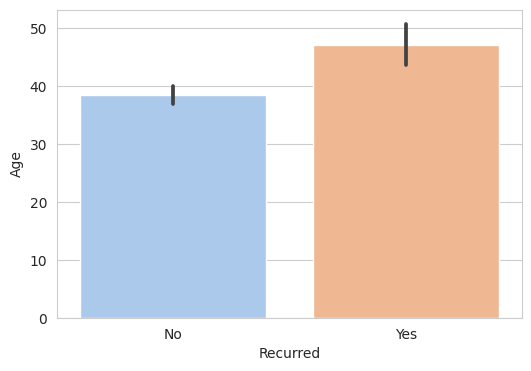

In [5]:
plt.figure(figsize = (6,4))

sns.barplot(data = df, x = 'Recurred', y = 'Age')
plt.show()

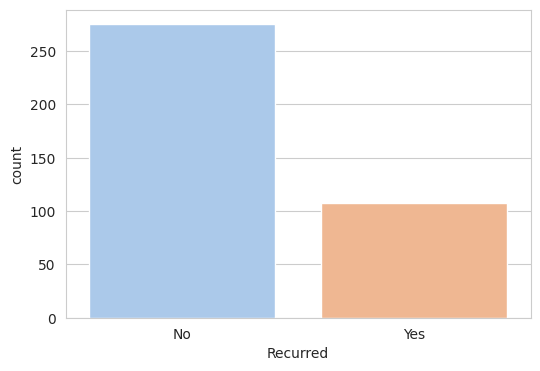

In [6]:
plt.figure(figsize = (6,4))

sns.countplot(data = df, x = 'Recurred')
plt.show()

In [10]:
#Reuce Çıkışını Değiştirme
df.Recurred = df.Recurred.replace({'No': 0, 'Yes': 1})

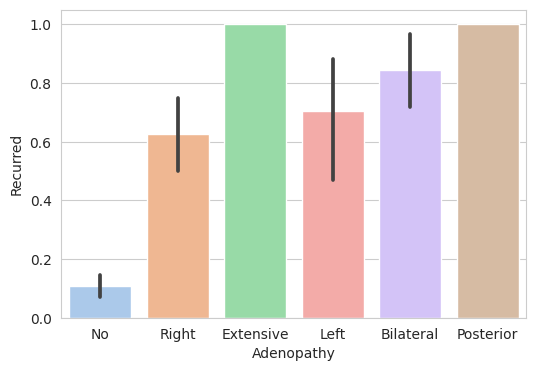

In [11]:
plt.figure(figsize = (6,4))

sns.barplot(data = df, x = 'Adenopathy', y = 'Recurred')
plt.show()

### Data Hazırlama

In [18]:
ordinal_cols = ['Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy', 'Focality', 'Risk', 'T', 'N', 'M', 'Stage','Adenopathy','Response']

ordinal = df[ordinal_cols]

ordinal_pipeline = Pipeline([('ordinal encoder', OrdinalEncoder())])

ordinal_tr = ordinal_pipeline.fit_transform(ordinal)
ordinal_tr

array([[0., 0., 0., ..., 0., 3., 2.],
       [0., 0., 1., ..., 0., 3., 1.],
       [0., 0., 0., ..., 0., 3., 1.],
       ...,
       [1., 1., 1., ..., 4., 0., 3.],
       [1., 1., 1., ..., 3., 1., 3.],
       [1., 1., 0., ..., 3., 0., 3.]])

In [19]:
cat_cols = ['Thyroid Function', 'Physical Examination', 'Pathology']

cat = df[cat_cols]

cat_pipeline = Pipeline([
    ('one hot encoder', OneHotEncoder())
])

cat_tr = cat_pipeline.fit_transform(cat)
cat_tr = cat_tr.toarray()
cat_tr

array([[0., 0., 1., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 1.],
       [1., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 1.]])

In [20]:
num_cols = ['Age']

num = df[num_cols]

num_pipeline = Pipeline([
    ('scale', StandardScaler())
])

num_tr = num_pipeline.fit_transform(num)
num_tr[0:5]

array([[-0.91743929],
       [-0.45431469],
       [-0.71895732],
       [ 1.39818369],
       [ 1.39818369]])

In [21]:
full_pipeline = ColumnTransformer([
    ('ordinal', ordinal_pipeline, ordinal_cols),
    ('categorical', cat_pipeline, cat_cols),
    ('numerical', num_pipeline, num_cols)
])

data_prepared = full_pipeline.fit_transform(df)
data_prepared

array([[ 0.        ,  0.        ,  0.        , ...,  1.        ,
         0.        , -0.91743929],
       [ 0.        ,  0.        ,  1.        , ...,  1.        ,
         0.        , -0.45431469],
       [ 0.        ,  0.        ,  0.        , ...,  1.        ,
         0.        , -0.71895732],
       ...,
       [ 1.        ,  1.        ,  1.        , ...,  0.        ,
         1.        ,  2.05979025],
       [ 1.        ,  1.        ,  1.        , ...,  0.        ,
         0.        ,  1.33202303],
       [ 1.        ,  1.        ,  0.        , ...,  0.        ,
         1.        ,  1.72898697]])

In [22]:
X = data_prepared
y = df.Recurred

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = .8, random_state = 21)

In [23]:
def getModel(model , x_train , y_train , x_test , y_test):
    mod = model.fit(x_train , y_train)
    predict = model.predict(x_test)
    print("------------Accury Score------------")
    print(accuracy_score(predict,y_test))
    print("------------Classification Report------------")
    print(classification_report(predict,y_test))
    sns.heatmap(confusion_matrix(predict,y_test),annot=True,fmt='.2f',cmap="crest")

------------Accury Score------------
0.961038961038961
------------Classification Report------------
              precision    recall  f1-score   support

           0       0.98      0.97      0.97        58
           1       0.90      0.95      0.92        19

    accuracy                           0.96        77
   macro avg       0.94      0.96      0.95        77
weighted avg       0.96      0.96      0.96        77



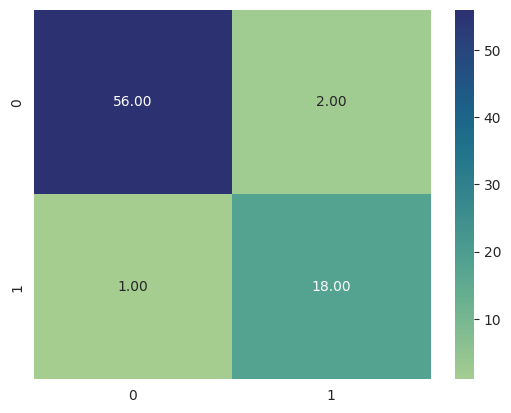

In [26]:
getModel(XGBClassifier(n_estimators = 100, max_depth = 10, gamma = 1, learning_rate = .1),X_train, y_train ,X_test, y_test)

------------Accury Score------------
0.935064935064935
------------Classification Report------------
              precision    recall  f1-score   support

           0       0.98      0.93      0.96        60
           1       0.80      0.94      0.86        17

    accuracy                           0.94        77
   macro avg       0.89      0.94      0.91        77
weighted avg       0.94      0.94      0.94        77



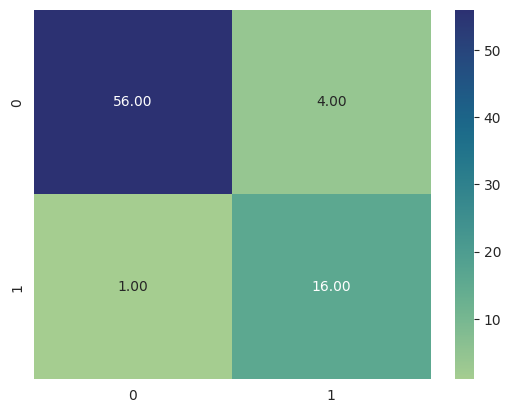

In [28]:
getModel(RandomForestClassifier(),X_train, y_train ,X_test, y_test)